# Stochastic Solver: Photo-current detection in a JC model

Copyright (C) 2011 and later, Paul D. Nation & Robert J. Johansson

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from qutip import (Options, about, destroy, fock, identity, mesolve,
                   parallel_map, photocurrent_mesolve, tensor)

%matplotlib inline
rcParams["font.family"] = "STIXGeneral"
rcParams["mathtext.fontset"] = "stix"
rcParams["font.size"] = "14"

In [2]:
N = 15
w0 = 1.0 * 2 * np.pi
g = 0.2 * 2 * np.pi
times = np.linspace(0, 15, 150)
dt = times[1] - times[0]
gamma = 0.01
kappa = 0.1
ntraj = 150

In [3]:
a = tensor(destroy(N), identity(2))
sm = tensor(identity(N), destroy(2))

In [4]:
H = w0 * a.dag() * a + w0 * sm.dag() * sm + g * (sm * a.dag() + sm.dag() * a)

In [5]:
rho0 = tensor(fock(N, 5), fock(2, 0))

In [6]:
e_ops = [a.dag() * a, a + a.dag(), sm.dag() * sm]

### Highly efficient detection

In [7]:
c_ops = [np.sqrt(gamma) * sm]  # collapse operator for qubit
sc_ops = [np.sqrt(kappa) * a]  # stochastic collapse for resonator

In [8]:
result_ref = mesolve(H, rho0, times, c_ops + sc_ops, e_ops)

In [9]:
result1 = photocurrent_mesolve(
    H,
    rho0,
    times,
    c_ops=c_ops,
    sc_ops=sc_ops,
    e_ops=e_ops,
    ntraj=1,
    nsubsteps=100,
    store_measurement=True,
    options=Options(store_states=True),
)

Total run time:   0.19s


Run the `smesolve` solver in parallel by passing the keyword argument `map_func=parallel_map`:

In [10]:
result2 = photocurrent_mesolve(
    H,
    rho0,
    times,
    c_ops=c_ops,
    sc_ops=sc_ops,
    e_ops=e_ops,
    ntraj=ntraj,
    nsubsteps=100,
    store_measurement=True,
    options=Options(store_states=True),
    map_func=parallel_map,
)

10.0%. Run time:   1.42s. Est. time left: 00:00:00:12


20.0%. Run time:   2.79s. Est. time left: 00:00:00:11


30.0%. Run time:   4.17s. Est. time left: 00:00:00:09


40.0%. Run time:   5.28s. Est. time left: 00:00:00:07


50.0%. Run time:   6.61s. Est. time left: 00:00:00:06


60.0%. Run time:   7.98s. Est. time left: 00:00:00:05


70.0%. Run time:   9.36s. Est. time left: 00:00:00:04


80.0%. Run time:  10.48s. Est. time left: 00:00:00:02


90.0%. Run time:  11.86s. Est. time left: 00:00:00:01


100.0%. Run time:  13.10s. Est. time left: 00:00:00:00


Total run time:  13.11s


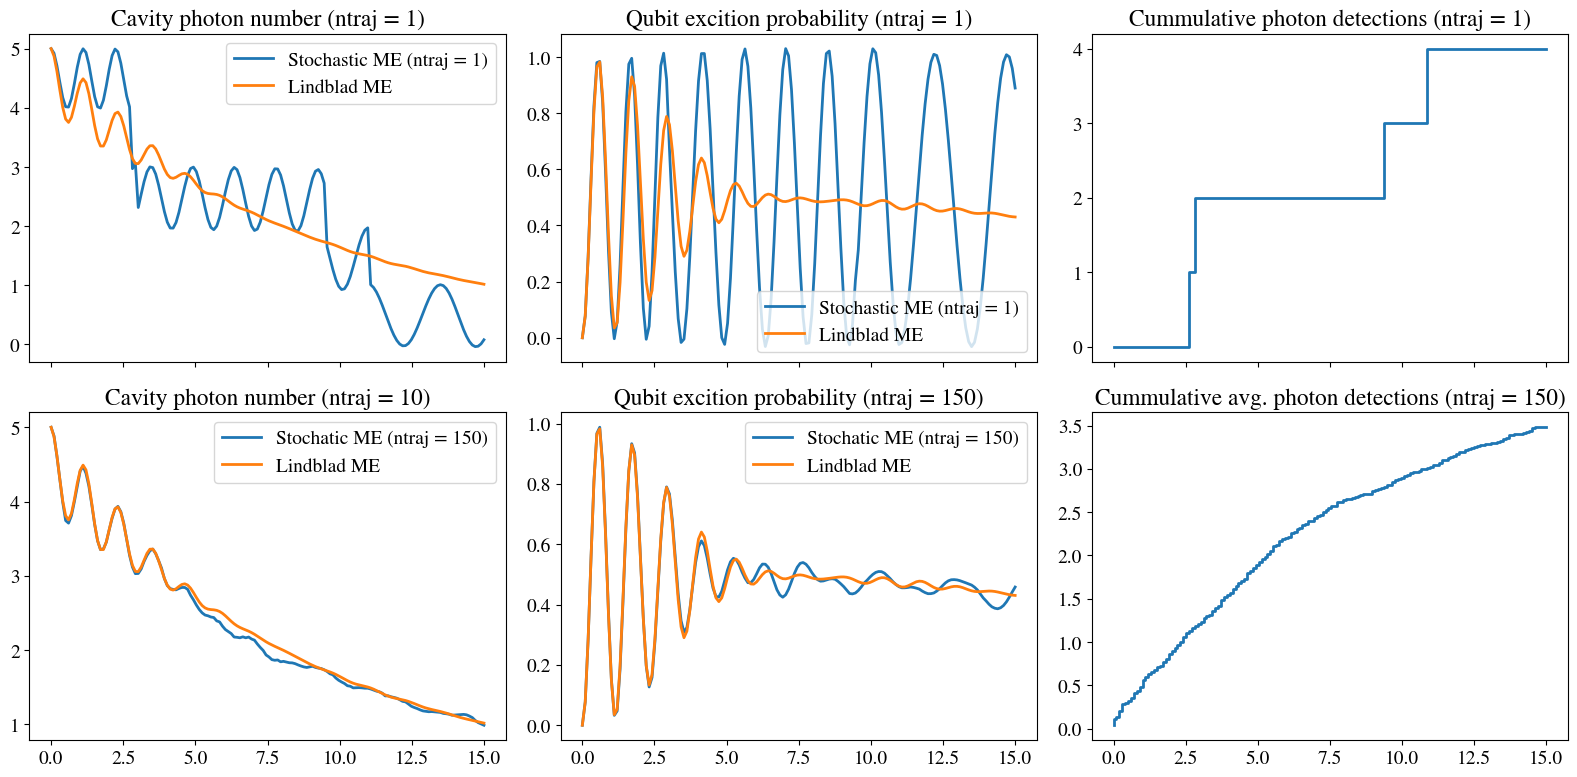

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)

axes[0, 0].plot(times,
                result1.expect[0], label=r"Stochastic ME (ntraj = 1)", lw=2)
axes[0, 0].plot(times, result_ref.expect[0], label=r"Lindblad ME", lw=2)
axes[0, 0].set_title("Cavity photon number (ntraj = 1)")
axes[0, 0].legend()

axes[1, 0].plot(
    times, result2.expect[0], label=r"Stochatic ME (ntraj = %d)" % ntraj, lw=2
)
axes[1, 0].plot(times, result_ref.expect[0], label=r"Lindblad ME", lw=2)
axes[1, 0].set_title("Cavity photon number (ntraj = 10)")
axes[1, 0].legend()


axes[0, 1].plot(times,
                result1.expect[2], label=r"Stochastic ME (ntraj = 1)", lw=2)
axes[0, 1].plot(times, result_ref.expect[2], label=r"Lindblad ME", lw=2)
axes[0, 1].set_title("Qubit excition probability (ntraj = 1)")
axes[0, 1].legend()

axes[1, 1].plot(
    times, result2.expect[2], label=r"Stochatic ME (ntraj = %d)" % ntraj, lw=2
)
axes[1, 1].plot(times, result_ref.expect[2], label=r"Lindblad ME", lw=2)
axes[1, 1].set_title("Qubit excition probability (ntraj = %d)" % ntraj)
axes[1, 1].legend()


axes[0, 2].step(times, dt * np.cumsum(result1.measurement[0].real), lw=2)
axes[0, 2].set_title("Cummulative photon detections (ntraj = 1)")
axes[1, 2].step(
    times,
    dt * np.cumsum(np.array(result2.measurement).sum(axis=0).real) / ntraj,
    lw=2
)
axes[1, 2].set_title("Cummulative avg. photon detections (ntraj = %d)" % ntraj)

fig.tight_layout()

## Versions

In [12]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.6
Numpy Version:      1.26.4
Scipy Version:      1.12.0
Cython Version:     0.29.37
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     4
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v4/lib/python3.10/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex refer